In [86]:
# LIBRERIAS
import matplotlib
from ipywidgets.widgets.widget_string import Label
import numpy as np
from scipy.stats import norm
import matplotlib.pylab as plt
from scipy import stats
import pandas as pd
from scipy.optimize import fmin
%matplotlib inline 
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
font = {'weight' : 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)
import seaborn as sns
import os
from scipy.stats import anderson
from scipy.stats import kstest
from scipy.stats import shapiro 
#to en otra carpeta
sns.set_theme()

Text(0, 0.5, '$Y$')

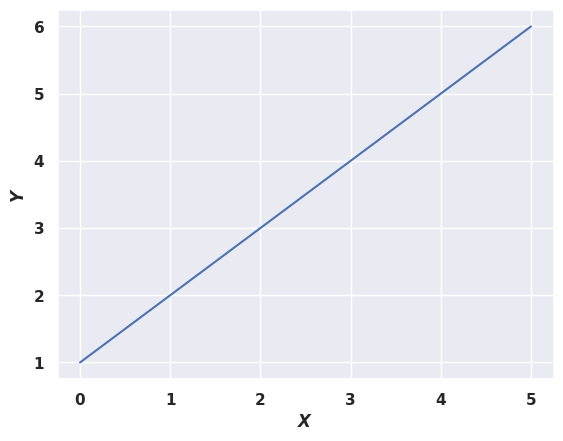

In [2]:
x_real=np.linspace(0,5,100)
a_real=1
b_real=1
y_real=a_real*x_real+b_real
plt.plot(x_real,y_real)
plt.xlabel('$X$')
plt.ylabel('$Y$')

In [40]:
def central(s,k):
    new_s=[]
    for i in range(0,len(s)):
        new_s.append(np.mean(np.random.choice(s,size=k)))
    return new_s

def confirm_gauss(s):
    result = (anderson(np.sort(s), dist='norm'))
    criterio=((result[0]<result[1][3])or(shapiro(np.sort(s))[1]>0.05))*1   
    return criterio

def pendiente(err,N):
    aas=[]
    mux=x_real[5]
    muy=y_real[5]
    mub=b_real
    for j in range(N):
        
        x=np.random.normal(mux,x_real[5]*err,1)[0]
        b=np.random.normal(mub,b_real*err,1)[0]
        y=np.random.normal(muy,y_real[5]*err,1)[0]
        aas.append((y-b)/x)
    return aas

    

Criterio Gaussiano 1
Criterio Gaussiano 1


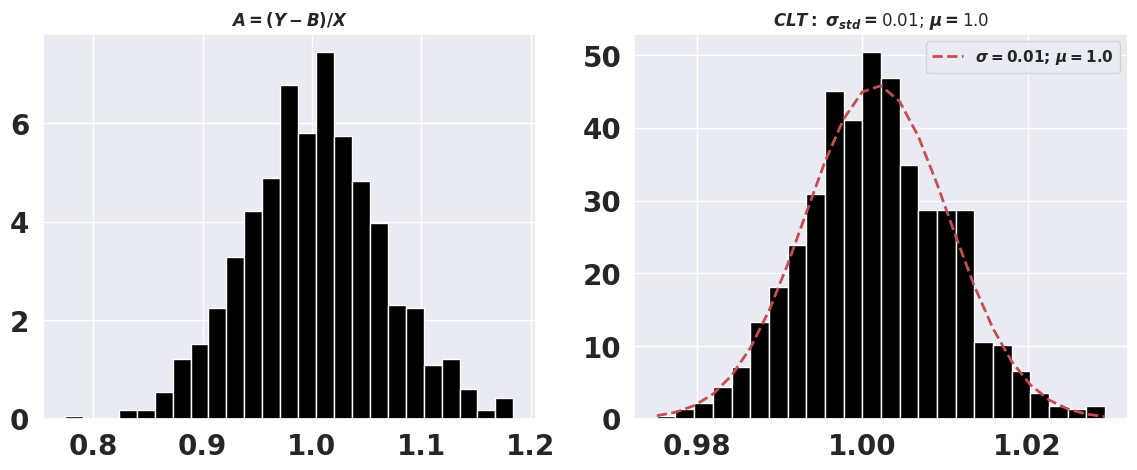

In [41]:
f=plt.figure(figsize=(14,5))

err=0.01
N=1000
z=pendiente(err,N)

plt.subplot(121)
n, bins, patches=plt.hist(z,bins='fd',density=True,color='black')
plt.title('$A=(Y-B)/X$')
print('Criterio Gaussiano',confirm_gauss(z))


plt.subplot(122)
n=50
clt=central(z,n)
desv=np.std(z,ddof=1)
standard=desv/np.sqrt(n)
plt.title('$CLT: $ $\sigma_{std}= $'+str(round(standard,2))+'; $\mu=$'+str(round(np.mean(z),2)))
n, bins, patches=plt.hist(clt,bins='fd',density=True,color='black')
(mu, sigma) = norm.fit(clt)
y = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y,'r--',label='$\sigma= $'+str(round(sigma,2))+'; $\mu=$'+str(round(mu,2)), linewidth=2)
plt.legend()
print('Criterio Gaussiano',confirm_gauss(clt))


In [42]:
f=plt.figure(figsize=(15,5))
er_r=np.linspace(0.001,0.4,60) #  Porcentaje de error
mu1=np.zeros((len(er_r)))
sigma1=np.zeros((len(er_r)))
mu2=np.zeros((len(er_r)))
sigma2=np.zeros((len(er_r)))
N=800
n=50


for k in range(len(er_r)):

    z=pendiente(er_r[k],N)
    desv=np.std(z,ddof=1)
    standard=desv/np.sqrt(n)
    if abs(np.mean(z)-a_real)<1.96*standard:
        
        mu1[k]=abs(np.mean(z)-a_real)
        sigma1[k]=er_r[k]
    else:
        mu2[k]=abs(np.mean(z)-a_real)
        sigma2[k]=er_r[k]
        

<Figure size 1500x500 with 0 Axes>

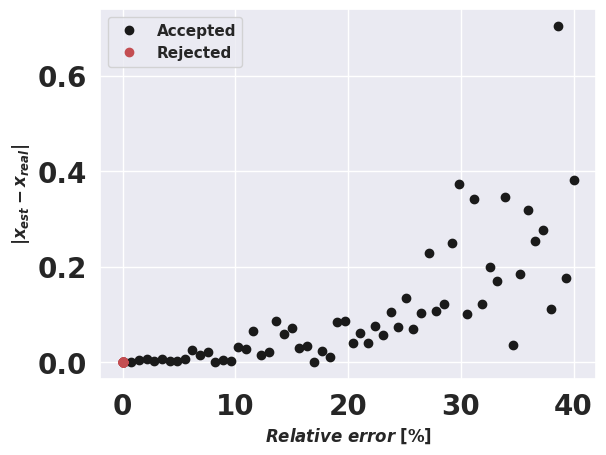

In [43]:
plt.plot(sigma1*100,mu1,'ko',label='Accepted')
plt.plot(sigma2*100,mu2,'ro',label='Rejected')
plt.ylabel(r'$\left | x_{est}-x_{real} \right |$')
plt.xlabel(r'$Relative$ $error$ $[\%]$')
plt.legend()

# Analisis de variación de un solo parametro.

In [87]:
def pendiente(err,mu,variar,N):
    
    aas=[]
    global mux; global muy; global mub; global errx; global erry; global errb 
    mux=x_real[5]
    muy=y_real[5]
    mub=b_real
    
    errx=0
    erry=0
    errb=0

    globals()[variar[0]]=mu
    globals()[variar[1]]=err*mu

  
    for j in range(N):
        
        x=np.random.normal(mux,errx,1)[0]
        b=np.random.normal(mub,errb,1)[0]
        y=np.random.normal(muy,erry,1)[0]
        aas.append((y-b)/x)
        
    return aas


In [88]:
f=plt.figure(figsize=(15,5))

variar=[['mux','errx'],['muy','erry'],['mub','errb']]
er_r=np.linspace(0.001,0.4,60) #  Porcentaje de error
mu_x=np.linspace(x_real[5]-x_real[5]*0.3,x_real[5]+x_real[5]*0.3,60)
mu_y=np.linspace(y_real[5]-y_real[5]*0.3,y_real[5]+y_real[5]*0.3,60)
mu_b=np.linspace(b_real-b_real*0.3,b_real+b_real*0.3,60)
names=['mu_x','mu_y','mu_b']
N=500
n=50

resultados=[]
for  cont, l in enumerate(variar):
    
    mu1=np.zeros((len(er_r),len(er_r)))

    for k in range(len(er_r)):

        for j in range(len(mu_x)):

            z=pendiente(er_r[j],eval(names[cont])[k],l,N)
        
            desv=np.std(z,ddof=1)

            standard=desv/np.sqrt(n)
            
            if abs(np.mean(z)-a_real)<1.96*standard:

                mu1[k,j]=1
            
            else:
                mu1[k,j]=0
                
    resultados.append(mu1)

<Figure size 1500x500 with 0 Axes>

([<matplotlib.axis.YTick at 0x7ff74de0c040>,
 [Text(0, 0, '0.7'), Text(0, 20, '0.903'), Text(0, 40, '1.107')])

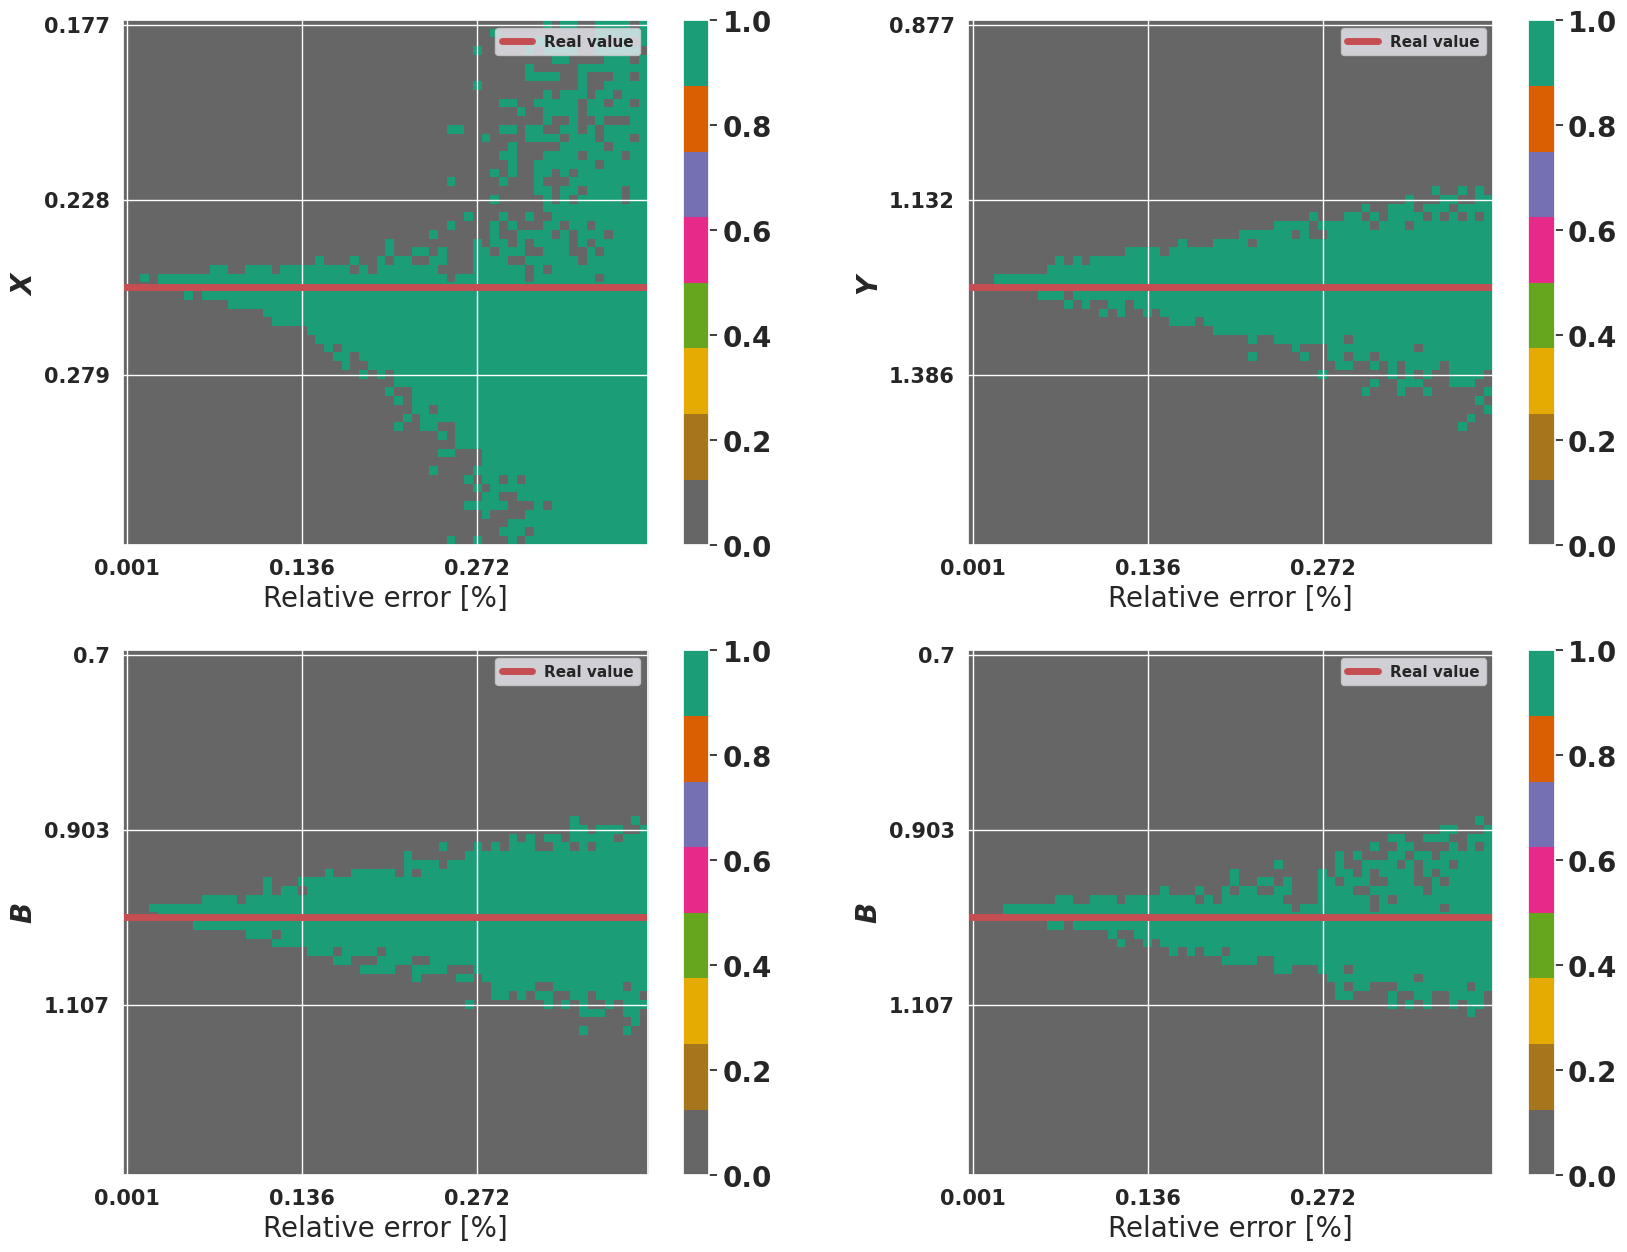

In [89]:
f=plt.figure(figsize=(20,15))
v_real=['X','Y','B']

for i,j in enumerate(names):

    plt.subplot(2,2,i+1)
    matplotlib.rc('xtick', labelsize=20) 
    matplotlib.rc('ytick', labelsize=20) 
    plt.imshow(resultados[i],cmap='Dark2_r')
    plt.axhline(y=30, label='Real value',lw=5, c="r")
    plt.ylabel('$' + v_real[i] + "$" ,fontsize=20)
    plt.xlabel('Relative error [%]',fontsize=20)
    plt.legend()
    plt.colorbar()


    nx = er_r.shape[0]
    no_labels = 4 # how many labels to see on axis x
    step_x = int(nx / (no_labels - 1)) # step between consecutive labels
    x_positions = np.arange(0,nx,step_x) # pixel count at label position
    x_labels = np.round(er_r[::step_x],3) # labels you want to see
    plt.xticks(x_positions, np.sort(x_labels),fontsize=15)

    mmm=eval(j)
    ny = mmm.shape[0]
    no_labels = 4 # how many labels to see on axis x
    step_y = int(ny / (no_labels - 1)) # step between consecutive labels
    y_positions = np.arange(0,ny,step_y) # pixel count at label position
    y_labels = np.round(mmm[::step_y],3) # labels you want to see
    plt.yticks(y_positions, np.sort(y_labels),fontsize=15)


plt.subplot(2,2,4)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
plt.imshow(resultados[0]*resultados[1]*resultados[2],cmap='Dark2_r')
plt.axhline(y=30, label='Real value',lw=5, c="r")
plt.ylabel('$' + v_real[i] + "$" ,fontsize=20)
plt.xlabel('Relative error [%]',fontsize=20)
plt.legend()
plt.colorbar()


nx = er_r.shape[0]
no_labels = 4 # how many labels to see on axis x
step_x = int(nx / (no_labels - 1)) # step between consecutive labels
x_positions = np.arange(0,nx,step_x) # pixel count at label position
x_labels = np.round(er_r[::step_x],3) # labels you want to see
plt.xticks(x_positions, np.sort(x_labels),fontsize=15)

mmm=eval(j)
ny = mmm.shape[0]
no_labels = 4 # how many labels to see on axis x
step_y = int(ny / (no_labels - 1)) # step between consecutive labels
y_positions = np.arange(0,ny,step_y) # pixel count at label position
y_labels = np.round(mmm[::step_y],3) # labels you want to see
plt.yticks(y_positions, np.sort(y_labels),fontsize=15)



# Analisis cuando 'a' es obtenido de un ajuste.

In [85]:
x_real=np.linspace(0,5,100)
a_real=1
b_real=1

def ruido(señal,desv): 
    '''
    Función para añadir ruido Gaussiano dada una desviación estandar

    Parametros
    ----------
    señal: Arreglo
      Arreglo con la señal a la que se le va añadir el ruido
    desv: float
      Desviación estandar
    '''
   
    señal_ruido=np.zeros(len(señal))
    señal_ruido=[ np.random.normal(señal[i], señal[i]*desv) for i in range(0,len(señal))]
    
    return np.array(señal_ruido)

def funcion(x,a):

    return a*x+b_real

Y_orig=funcion(x_real,a_real) # Señal real

def ajuste(err,mu,variar,N,metric):
    
    aas=[]

    global mux; global muy; global mub; global errx; global erry; global errb 

    mub=b_real
    
    errx=0
    erry=0
    errb=0

    globals()[variar[0]]=mu
    globals()[variar[1]]=err*mu

  
    for j in range(N): # Número de veces que se realizara el ajuste.
        
        x_=ruido(x_real,errx)

        b_real=np.random.normal(mub,errb,1)[0]

        y_=ruido(Y_orig,erry) # Señal asumida como experimental
        
        def metrica(a):
                ########################global focal,datos
            Y = funcion(x_real,a) # Transmitance

            if metric=='chi':
                dist =  sum((Y[i]-y_[i])**2/ruido**2  for i in range(len(T))) # values distance
            if metric=='min':
                dmin_E=np.amin(y_)
                dmin_T=np.amin(Y)
                dist = (dmin_E-dmin_T)**2 # values distance

            if metric=='max':
                dmin_E=np.max(y_)
                dmin_T=np.max(Y)
                dist = (dmin_E-dmin_T)**2 # values distance

            if metric=='chi_min':
                dmin_E=np.amin(y_)
                dmin_T=np.amin(T)
                dist = sum((T[i]-y_[i])**2 for i in range(len(Y)))+(dmin_E-dmin_T)**2 # values distance
            return dist

      # Fitting rutine

        param_opt = fmin(metrica, beta0, full_output=False, xtol=1e-8, disp=False)
        ECM=metrica(betaopt[0])# Metric \chi_{min}^2
        Prob= 1 - stats.chi2.cdf(ECM, nu) ## P(\chi^2_min,\nu)
  


    return aas